# Chart Benchmark Comparison

The purpose of this comparison is to measure each chart libraries performance.

We use dataset from [data.json](./bench/data.json) which has `388,858` data points.

### Disclaimer

- I mostly did not edit code. All I changed files in bench folder is to format code and replace `fetch(./data.json)` with `fetch("https://raw.githubusercontent.com/keita-determined/chart-benchmark/main/bench/data.json")` since data wasn't loaded on browser.
  - Also, added zoom feature in [Echart5.html](./bench/ECharts5.html) to compare the performance between Echarts and uPlot.
- I removed some chart libraries' files since these libraries don't meet our requirements, or library versions are outdated.
- Even though I didn't change logic in files, some chart styles look broken. However, I believe it's not an issue to measure benchmarks.

### Credit

The original code is found in https://github.com/leeoniya/uPlot/tree/master/bench

Thank you

---

## How to Measure Benchmarks

In the [bench folder](./bench/) files, you can find code like `console.time('prep');`, `console.timeEnd('prep');`, so you can see how long it took to render charts. In these files, we measure 2 things.

1. `prep` time: how long it takes to prepare data for charts (ms)
2. `chart` time: how long it takes to render charts (ms)

You can see the respective result in browser console.

The way of measurement is to refresh each chart pages 3 times and get the average.

### Env

- Chrome with private mode (No throttling)
- M1 Mac with Apple M1 Max (10 core), 32 GB mem


## Benchmark Analysis

### Candidates

- [Apex Chart](https://apexcharts.com/)
- [Canvas.js](https://canvasjs.com/)
- [Chart.js v2](https://www.chartjs.org/docs/2.9.4/)
- [Chart.js v3](https://www.chartjs.org/)
- [Echarts](https://echarts.apache.org/en/index.html)
- [Flot](https://www.flotcharts.org/)
- [High Charts](https://www.highcharts.com/)
- [Lightning Chart](https://lightningchart.com/)
- [uPlot](https://github.com/leeoniya/uPlot)
- [Zing Chart](https://www.zingchart.com/)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

NAME = 'name'
PREP = 'prep'
CHART = 'chart'

apex_chart = {}
canvasjs = {}
chartjs_v2 = {}
chartjs_v3 = {}
chartjs_v4 = {}
echarts = {}
flot = {}
high_charts = {}
lightning_chart = {}
uplot = {}
zing_chart = {}

apex_chart[NAME] = 'Apex Chart'
apex_chart[PREP] = [8.200000017881393, 18.900000005960464, 5.9000000059604645]
apex_chart[CHART] = [389.90000000596046, 403.7999999821186, 399.59999999403954]

canvasjs[NAME] = 'Canvas.js'
canvasjs[PREP] = [6, 21.68505859375, 7.0999999940395355, 6.5]
canvasjs[CHART] = [110.09999999403954, 78.7000000178814, 78.09999999403954]

chartjs_v2[NAME] = 'Chart.js v2'
chartjs_v2[PREP] = [9.199999988079071, 12.599999994039536, 11.400000005960464]
chartjs_v2[CHART] = [200.69999998807907, 207.7999999821186, 204.40000000596046]

chartjs_v3[NAME] = 'Chart.js v3'
chartjs_v3[PREP] = [8.199999988079071, 8.5, 6]
chartjs_v3[CHART] = [32.400000005960464, 24.19999998807907, 22.799999982118607]

chartjs_v4[NAME] = 'Chart.js v4'
chartjs_v4[PREP] = [8.099999994039536, 8.900000005960464, 8]
chartjs_v4[CHART] = [33.29999998211861, 24, 24.100000023841858]

echarts[NAME] = 'Echarts'
echarts[PREP] = [3.100000023841858, 1.5999999940395355, 2.300000011920929]
echarts[CHART] = [69.59999999403954, 36, 35.80000001192093]

flot[NAME] = 'Flot'
flot[PREP] = [8.400000005960464, 10.100000023841858, 8.600000023841858]
flot[CHART] = [51.900000005960464, 45.80000001192093, 43.79999998211861]

high_charts[NAME] = 'High Charts'
high_charts[PREP] = [7.299999982118607, 6.700000017881393, 6.5]
high_charts[CHART] = [66.5, 70.09999999403954, 61.599999994039536]

lightning_chart[NAME] = 'Lightning Chart'
lightning_chart[PREP] = [18.936767578125, 28.4267578125, 27.112060546875]
lightning_chart[CHART] = [55.493896484375, 31.718994140625, 34.81005859375]

uplot[NAME] = 'uPlot'
uplot[PREP] = [3, 6.4000000059604645, 3.100000023841858]
uplot[CHART] = [18.899999976158142, 20.700000017881393, 15.799999982118607]

zing_chart[NAME] = 'Zing Chart'
zing_chart[PREP] = [8.199999988079071, 9, 8.699999988079071]
zing_chart[CHART] = [472.5, 471.7000000178814, 514.5]

all_chart_data = [apex_chart, canvasjs, chartjs_v2, chartjs_v3, chartjs_v4, echarts, flot, high_charts, lightning_chart, uplot, zing_chart]
name_list = []
prep_list = []
chart_list = []
for data in all_chart_data:
  name_list += [data.get(NAME)]
  prep_list += [data.get(PREP)]
  chart_list += [data.get(CHART)]

df_dict = {
    NAME: name_list,
    PREP: prep_list,
    CHART: chart_list
}

df = pd.DataFrame(df_dict)
df['prep_ave'] = df[PREP].apply(np.mean)
df['chart_ave'] = df[CHART].apply(np.mean)
df['total'] = df['prep_ave'] + df['chart_ave']
df.style


,name,prep,chart,prep_ave,chart_ave,total
0,Apex Chart,"[8.200000017881393, 18.900000005960464, 5.9000000059604645]","[389.90000000596046, 403.7999999821186, 399.59999999403954]",11.000000,397.766667,408.766667
1,Canvas.js,"[6, 21.68505859375, 7.0999999940395355, 6.5]","[110.09999999403954, 78.7000000178814, 78.09999999403954]",10.321265,88.966667,99.287931
2,Chart.js v2,"[9.199999988079071, 12.599999994039536, 11.400000005960464]","[200.69999998807907, 207.7999999821186, 204.40000000596046]",11.066667,204.300000,215.366667
3,Chart.js v3,"[8.199999988079071, 8.5, 6]","[32.400000005960464, 24.19999998807907, 22.799999982118607]",7.566667,26.466667,34.033333
4,Chart.js v4,"[8.099999994039536, 8.900000005960464, 8]","[33.29999998211861, 24, 24.100000023841858]",8.333333,27.133333,35.466667
5,Echarts,"[3.100000023841858, 1.5999999940395355, 2.300000011920929]","[69.59999999403954, 36, 35.80000001192093]",2.333333,47.133333,49.466667
6,Flot,"[8.400000005960464, 10.100000023841858, 8.600000023841858]","[51.900000005960464, 45.80000001192093, 43.79999998211861]",9.033333,47.166667,56.200000
7,High Charts,"[7.299999982118607, 6.700000017881393, 6.5]","[66.5, 70.09999999403954, 61.599999994039536]",6.833333,66.066667,72.900000
8,Lightning Chart,"[18.936767578125, 28.4267578125, 27.112060546875]","[55.493896484375, 31.718994140625, 34.81005859375]",24.825195,40.674316,65.499512
9,uPlot,"[3, 6.4000000059604645, 3.100000023841858]","[18.899999976158142, 20.700000017881393, 15.799999982118607]",4.166667,18.466667,22.633333


### Sort by `prep_ave`

In [2]:
df.sort_values(by=['prep_ave'])


,name,prep,chart,prep_ave,chart_ave,total
5,Echarts,"[3.100000023841858, 1.5999999940395355, 2.3000...","[69.59999999403954, 36, 35.80000001192093]",2.333333,47.133333,49.466667
9,uPlot,"[3, 6.4000000059604645, 3.100000023841858]","[18.899999976158142, 20.700000017881393, 15.79...",4.166667,18.466667,22.633333
7,High Charts,"[7.299999982118607, 6.700000017881393, 6.5]","[66.5, 70.09999999403954, 61.599999994039536]",6.833333,66.066667,72.900000
3,Chart.js v3,"[8.199999988079071, 8.5, 6]","[32.400000005960464, 24.19999998807907, 22.799...",7.566667,26.466667,34.033333
4,Chart.js v4,"[8.099999994039536, 8.900000005960464, 8]","[33.29999998211861, 24, 24.100000023841858]",8.333333,27.133333,35.466667
10,Zing Chart,"[8.199999988079071, 9, 8.699999988079071]","[472.5, 471.7000000178814, 514.5]",8.633333,486.233333,494.866667
6,Flot,"[8.400000005960464, 10.100000023841858, 8.6000...","[51.900000005960464, 45.80000001192093, 43.799...",9.033333,47.166667,56.200000
1,Canvas.js,"[6, 21.68505859375, 7.0999999940395355, 6.5]","[110.09999999403954, 78.7000000178814, 78.0999...",10.321265,88.966667,99.287931
0,Apex Chart,"[8.200000017881393, 18.900000005960464, 5.9000...","[389.90000000596046, 403.7999999821186, 399.59...",11.000000,397.766667,408.766667
2,Chart.js v2,"[9.199999988079071, 12.599999994039536, 11.400...","[200.69999998807907, 207.7999999821186, 204.40...",11.066667,204.300000,215.366667


<Axes: xlabel='name'>

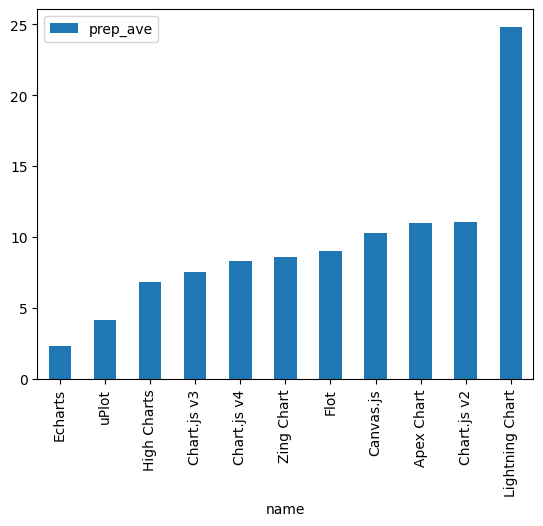

In [3]:
df.sort_values(by=['prep_ave']).plot(x='name', y='prep_ave', kind='bar')


### Sort by `chart_ave`

In [4]:
df.sort_values(by=['chart_ave'])


,name,prep,chart,prep_ave,chart_ave,total
9,uPlot,"[3, 6.4000000059604645, 3.100000023841858]","[18.899999976158142, 20.700000017881393, 15.79...",4.166667,18.466667,22.633333
3,Chart.js v3,"[8.199999988079071, 8.5, 6]","[32.400000005960464, 24.19999998807907, 22.799...",7.566667,26.466667,34.033333
4,Chart.js v4,"[8.099999994039536, 8.900000005960464, 8]","[33.29999998211861, 24, 24.100000023841858]",8.333333,27.133333,35.466667
8,Lightning Chart,"[18.936767578125, 28.4267578125, 27.112060546875]","[55.493896484375, 31.718994140625, 34.81005859...",24.825195,40.674316,65.499512
5,Echarts,"[3.100000023841858, 1.5999999940395355, 2.3000...","[69.59999999403954, 36, 35.80000001192093]",2.333333,47.133333,49.466667
6,Flot,"[8.400000005960464, 10.100000023841858, 8.6000...","[51.900000005960464, 45.80000001192093, 43.799...",9.033333,47.166667,56.200000
7,High Charts,"[7.299999982118607, 6.700000017881393, 6.5]","[66.5, 70.09999999403954, 61.599999994039536]",6.833333,66.066667,72.900000
1,Canvas.js,"[6, 21.68505859375, 7.0999999940395355, 6.5]","[110.09999999403954, 78.7000000178814, 78.0999...",10.321265,88.966667,99.287931
2,Chart.js v2,"[9.199999988079071, 12.599999994039536, 11.400...","[200.69999998807907, 207.7999999821186, 204.40...",11.066667,204.300000,215.366667
0,Apex Chart,"[8.200000017881393, 18.900000005960464, 5.9000...","[389.90000000596046, 403.7999999821186, 399.59...",11.000000,397.766667,408.766667


<Axes: xlabel='name'>

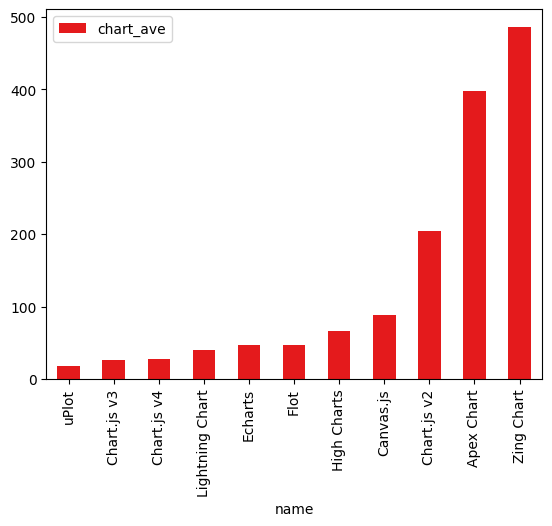

In [5]:
df.sort_values(by=['chart_ave']).plot(x='name', y='chart_ave', kind='bar', colormap='Set1')


### Sort by `total`

In [6]:
df.sort_values(by=['total'])


,name,prep,chart,prep_ave,chart_ave,total
9,uPlot,"[3, 6.4000000059604645, 3.100000023841858]","[18.899999976158142, 20.700000017881393, 15.79...",4.166667,18.466667,22.633333
3,Chart.js v3,"[8.199999988079071, 8.5, 6]","[32.400000005960464, 24.19999998807907, 22.799...",7.566667,26.466667,34.033333
4,Chart.js v4,"[8.099999994039536, 8.900000005960464, 8]","[33.29999998211861, 24, 24.100000023841858]",8.333333,27.133333,35.466667
5,Echarts,"[3.100000023841858, 1.5999999940395355, 2.3000...","[69.59999999403954, 36, 35.80000001192093]",2.333333,47.133333,49.466667
6,Flot,"[8.400000005960464, 10.100000023841858, 8.6000...","[51.900000005960464, 45.80000001192093, 43.799...",9.033333,47.166667,56.200000
8,Lightning Chart,"[18.936767578125, 28.4267578125, 27.112060546875]","[55.493896484375, 31.718994140625, 34.81005859...",24.825195,40.674316,65.499512
7,High Charts,"[7.299999982118607, 6.700000017881393, 6.5]","[66.5, 70.09999999403954, 61.599999994039536]",6.833333,66.066667,72.900000
1,Canvas.js,"[6, 21.68505859375, 7.0999999940395355, 6.5]","[110.09999999403954, 78.7000000178814, 78.0999...",10.321265,88.966667,99.287931
2,Chart.js v2,"[9.199999988079071, 12.599999994039536, 11.400...","[200.69999998807907, 207.7999999821186, 204.40...",11.066667,204.300000,215.366667
0,Apex Chart,"[8.200000017881393, 18.900000005960464, 5.9000...","[389.90000000596046, 403.7999999821186, 399.59...",11.000000,397.766667,408.766667


<Axes: xlabel='name'>

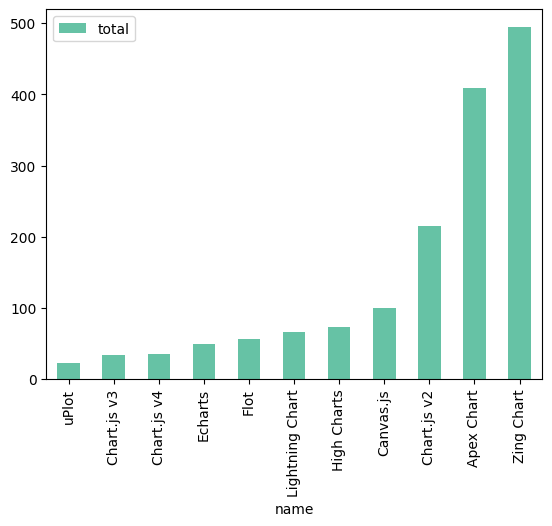

In [7]:
df.sort_values(by=['total']).plot(x='name', y='total', kind='bar', colormap='Set2')


## Conclusion

Undoubtedly, `uPlot` is the fastest to render charts. However, `Lightning Chart`, `Chartjs v3`, and `Echarts` are fast enough to render charts with `388,858` data points.